### V-Net architecture by: **Fausto Milletari, Nassir Navab, and Seyed Ahmad Ahmadi**. V-Net: *Fully convolutional neural networks for volumetric medical image segmentation.*

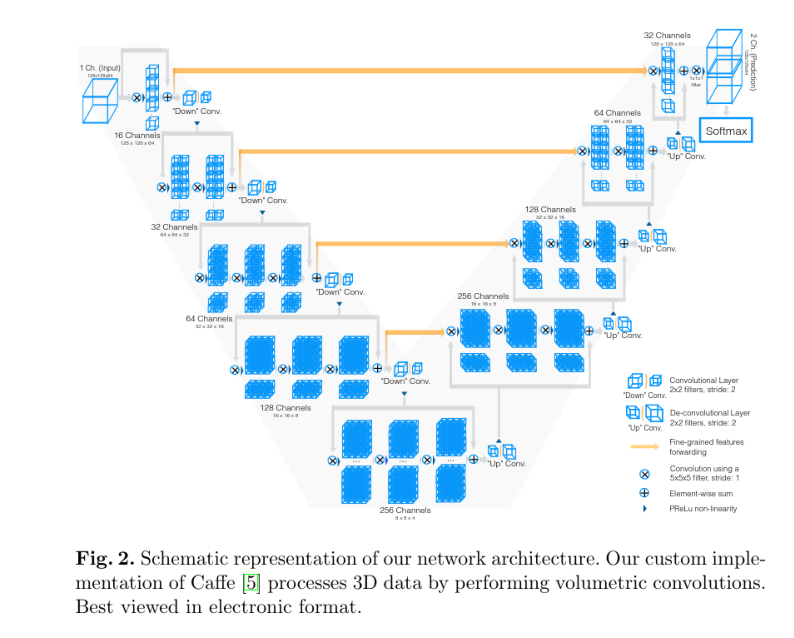

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
image=cv2.imread('/content/V-Net architecture .png')
convert_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(convert_image)
plt.axis('off')
plt.show()

### Let's first try to reproduce a simple implementation of V-Net architecture before we try to modify it to adapt  for time series and green turtle.

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D,MaxPooling3D, Conv3DTranspose, concatenate

In [17]:
class V_Net:
    def __init__(self, input_shape, num_class_labels):
        self.input_shape = input_shape
        self.num_class_labels = num_class_labels
        self.model = self.build_VN_model()

    def build_VN_model(self):
        inputs = Input(shape=self.input_shape)

        ##########  Encoder part

## Down conv1 (convolutional layer)
        conv1 = Conv3D(16, 3, activation='relu', padding='same')(inputs)
        pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

## Down conv2 (convolutional layer)
        conv2 = Conv3D(32, 3, activation='relu', padding='same')(pool1)
        pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

## Down conv3 (convolutional layer)
        conv3 = Conv3D(64, 3, activation='relu', padding='same')(pool2)
        pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

        ##
        conv4 = Conv3D(128, 3, activation='relu', padding='same')(pool3)
        ##

        ############ Decoder part

## Up conv1 (De-convolutional layer)
        up5 = Conv3DTranspose(64, 2, strides=(2, 2, 2), activation='relu', padding='same')(conv4)
        merge5 = concatenate([conv3, up5], axis=-1) #concatenation
        conv5 = Conv3D(64, 3, activation='relu', padding='same')(merge5)

## Up conv2 (De-convolutional layer)
        up6 = Conv3DTranspose(32, 2, strides=(2, 2, 2), activation='relu', padding='same')(conv5)
        merge6 = concatenate([conv2, up6], axis=-1) #concatenation
        conv6 = Conv3D(32, 3, activation='relu', padding='same')(merge6)

## Up conv3 (De-convolutional layer)
        up7 = Conv3DTranspose(16, 2, strides=(2, 2, 2), activation='relu', padding='same')(conv6)
        merge7 = concatenate([conv1, up7], axis=-1) #concatenation
        conv7 = Conv3D(16, 3, activation='relu', padding='same')(merge7)

        # Output layer
        outputs = Conv3D(self.num_class_labels, 1, activation='softmax')(conv7)
        # define the model
        model = tf.keras.Model(inputs=inputs, outputs=outputs, name='V-Net')
        return model

# Example usage:
input_shape = (80, 80, 80, 3)  # Example input shape (depth, height, width, channels)
num_classes =7  # Example number of output classes
V_net = V_Net(input_shape, num_classes)
V_net.model.summary()

Model: "V-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 80, 80, 80, 3)]      0         []                            
                                                                                                  
 conv3d_23 (Conv3D)          (None, 80, 80, 80, 16)       1312      ['input_8[0][0]']             
                                                                                                  
 max_pooling3d_10 (MaxPooli  (None, 40, 40, 40, 16)       0         ['conv3d_23[0][0]']           
 ng3D)                                                                                            
                                                                                                  
 conv3d_24 (Conv3D)          (None, 40, 40, 40, 32)       13856     ['max_pooling3d_10[0][0]']

#Question 3: Code the architecture of the V-Net adapted for time series and green turtle.

We will modify the input and output layers to accept 2D image data and process the image along a single dimension (1D CNN). process below:



1.  **modification of input layer** : we adjust the input layer to accept 2D image data instead.
2.   use 1D convolutional layers throughtout the arrchitecture to process the imade along a single dimension
3. use 1D convolutional transpose layers in the decoder part to upsample the feature maps.
4. **modification of output layer** : we replace the output layer of the original V-Net by a fully connected layer follow by softmax activation function.

### conclusion: the architecture retains the whole structure of the V-Net while adapting it for image classification using 1D convolutions. (it maintains the spatial information).


Note: for our particular example from class in green turtle behaviour classification task, we have the following parameters:


*   num_class_labels= 7
*   input_shape= (80,14)



In [10]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Conv1D,MaxPooling1D, Conv1DTranspose, concatenate,Flatten,Dense

In [15]:
class V_Net_adapted:
    def __init__(self, input_shape, num_class_labels):
        self.input_shape = input_shape
        self.num_class_labels = num_class_labels
        self.model = self.build_VN_model()

    def build_VN_model(self):
        inputs = Input(shape=self.input_shape)

        ##########  Encoder part

## Down conv1 (convolutional layer)
        conv1 = Conv1D(16, 3, activation='relu', padding='same')(inputs)
        pool1 = MaxPooling1D(pool_size=2)(conv1)

## Down conv2 (convolutional layer)
        conv2 = Conv1D(32, 3, activation='relu', padding='same')(pool1)
        pool2 = MaxPooling1D(pool_size=2)(conv2)

## Down conv3 (convolutional layer)
        conv3 = Conv1D(64, 3, activation='relu', padding='same')(pool2)
        pool3 = MaxPooling1D(pool_size=2)(conv3)

        ##
        conv4 = Conv1D(128, 3, activation='relu', padding='same')(pool3)
        ##

        ############ Decoder part

## Up conv1 (De-convolutional layer)
        up5 = Conv1DTranspose(64, 2, strides=2, activation='relu', padding='same')(conv4)
        merge5 = concatenate([conv3, up5], axis=-1) #concatenation
        conv5 = Conv1D(64, 3, activation='relu', padding='same')(merge5)

## Up conv2 (De-convolutional layer)
        up6 = Conv1DTranspose(32, 2, strides=2, activation='relu', padding='same')(conv5)
        merge6 = concatenate([conv2, up6], axis=-1) #concatenation
        conv6 = Conv1D(32, 3, activation='relu', padding='same')(merge6)

## Up conv3 (De-convolutional layer)
        up7 = Conv1DTranspose(16, 2, strides=2, activation='relu', padding='same')(conv6)
        merge7 = concatenate([conv1, up7], axis=-1) #concatenation
        conv7 = Conv1D(16, 3, activation='relu', padding='same')(merge7)


         # Flatten to feed in fully connected layer
        x = Flatten()(conv7)

        # Fully connected layer consists of 64 units
        fcl = Dense(64, activation='relu')(x)
        # Output layer
        outputs = Dense(num_class_labels, activation='softmax')(fcl)

        #define the model
        model =keras.Model(inputs=inputs, outputs=outputs, name='V-Net-adapted')
        return model


#######
input_shape = (80, 14)  #  shape of the image
num_class_labels = 7 # number of  behaviour classes
V_net_adapted=V_Net_adapted(input_shape, num_class_labels)

V_net_adapted.model.summary()

Model: "V-Net-adapted"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 80, 14)]             0         []                            
                                                                                                  
 conv1d_15 (Conv1D)          (None, 80, 16)               688       ['input_7[0][0]']             
                                                                                                  
 max_pooling1d_6 (MaxPoolin  (None, 40, 16)               0         ['conv1d_15[0][0]']           
 g1D)                                                                                             
                                                                                                  
 conv1d_16 (Conv1D)          (None, 40, 32)               1568      ['max_pooling1d_6[